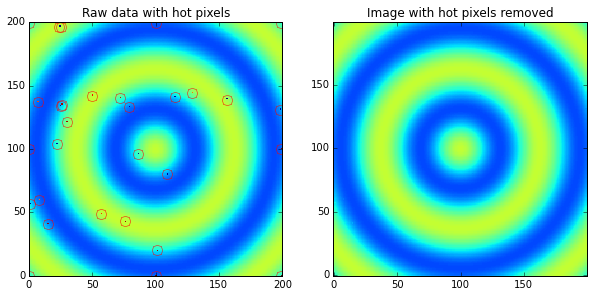

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

plt.figure(figsize=(10,5))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

#make some sample data
x = np.linspace(-5,5,200)
X,Y = np.meshgrid(x,x)
Z = 100*np.cos(np.sqrt(x**2 + Y**2))**2 + 50

np.random.seed(1)
for i in range(0,11):
    #Add some hot pixels
    Z[np.random.randint(low=0,high=199),np.random.randint(low=0,high=199)]= np.random.randint(low=200,high=255)
    #and dead pixels
    Z[np.random.randint(low=0,high=199),np.random.randint(low=0,high=199)]= np.random.randint(low=0,high=10)

#And some hot pixels in the corners and edges
Z[0,0]   =255
Z[-1,-1] =255
Z[-1,0]  =255
Z[0,-1]  =255
Z[0,100] =255
Z[-1,100]=255
Z[100,0] =255
Z[100,-1]=255

#Then plot it
ax1.set_title('Raw data with hot pixels')
ax1.imshow(Z,interpolation='nearest',origin='lower')

def find_outlier_pixels(data,tolerance=3,worry_about_edges=True):
    #This function finds the hot or dead pixels in a 2D dataset. 
    #tolerance is the number of standard deviations used to cutoff the hot pixels
    #If you want to ignore the edges and greatly speed up the code, then set
    #worry_about_edges to False.
    #
    #The function returns a list of hot pixels and also an image with with hot pixels removed

    from scipy.ndimage import median_filter
    blurred = median_filter(Z, size=2)
    difference = data - blurred
    threshold = 10*np.std(difference)

    #find the hot pixels, but ignore the edges
    hot_pixels = np.nonzero((np.abs(difference[1:-1,1:-1])>threshold) )
    hot_pixels = np.array(hot_pixels) + 1 #because we ignored the first row and first column

    fixed_image = np.copy(data) #This is the image with the hot pixels removed
    for y,x in zip(hot_pixels[0],hot_pixels[1]):
        fixed_image[y,x]=blurred[y,x]

    if worry_about_edges == True:
        height,width = np.shape(data)

        ###Now get the pixels on the edges (but not the corners)###

        #left and right sides
        for index in range(1,height-1):
            #left side:
            med  = np.median(data[index-1:index+2,0:2])
            diff = np.abs(data[index,0] - med)
            if diff>threshold: 
                hot_pixels = np.hstack(( hot_pixels, [[index],[0]]  ))
                fixed_image[index,0] = med

            #right side:
            med  = np.median(data[index-1:index+2,-2:])
            diff = np.abs(data[index,-1] - med)
            if diff>threshold: 
                hot_pixels = np.hstack(( hot_pixels, [[index],[width-1]]  ))
                fixed_image[index,-1] = med

        #Then the top and bottom
        for index in range(1,width-1):
            #bottom:
            med  = np.median(data[0:2,index-1:index+2])
            diff = np.abs(data[0,index] - med)
            if diff>threshold: 
                hot_pixels = np.hstack(( hot_pixels, [[0],[index]]  ))
                fixed_image[0,index] = med

            #top:
            med  = np.median(data[-2:,index-1:index+2])
            diff = np.abs(data[-1,index] - med)
            if diff>threshold: 
                hot_pixels = np.hstack(( hot_pixels, [[height-1],[index]]  ))
                fixed_image[-1,index] = med

        ###Then the corners###

        #bottom left
        med  = np.median(data[0:2,0:2])
        diff = np.abs(data[0,0] - med)
        if diff>threshold: 
            hot_pixels = np.hstack(( hot_pixels, [[0],[0]]  ))
            fixed_image[0,0] = med

        #bottom right
        med  = np.median(data[0:2,-2:])
        diff = np.abs(data[0,-1] - med)
        if diff>threshold: 
            hot_pixels = np.hstack(( hot_pixels, [[0],[width-1]]  ))
            fixed_image[0,-1] = med

        #top left
        med  = np.median(data[-2:,0:2])
        diff = np.abs(data[-1,0] - med)
        if diff>threshold: 
            hot_pixels = np.hstack(( hot_pixels, [[height-1],[0]]  ))
            fixed_image[-1,0] = med

        #top right
        med  = np.median(data[-2:,-2:])
        diff = np.abs(data[-1,-1] - med)
        if diff>threshold: 
            hot_pixels = np.hstack(( hot_pixels, [[height-1],[width-1]]  ))
            fixed_image[-1,-1] = med

    return hot_pixels,fixed_image


hot_pixels,fixed_image = find_outlier_pixels(Z)

for y,x in zip(hot_pixels[0],hot_pixels[1]):
    ax1.plot(x,y,'ro',mfc='none',mec='r',ms=10)

ax1.set_xlim(0,200)
ax1.set_ylim(0,200)

ax2.set_title('Image with hot pixels removed')
ax2.imshow(fixed_image,interpolation='nearest',origin='lower',clim=(0,255))

plt.show()



In [36]:
from scipy.ndimage import median_filter

def auto_mask(image, size=50, thershold=2):

    blur_image = median_filter(image, size)
    diff_image = image - blur_image
    thershold_value = thershold*np.std(diff_image)

    dead_pixels = np.nonzero((np.abs(diff_image[4: -4, 4: -4])) > thershold_value)
    dead_pixels = np.array(dead_pixels) + 4

    for i, j in zip(dead_pixels[0], dead_pixels[1]):
        image[i, j] = blur_image[i, j]
    return image

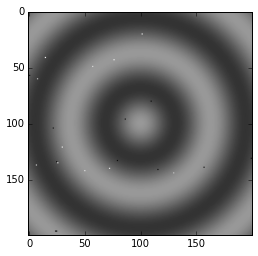

In [3]:

#make some sample data
x = np.linspace(-5,5,200)
X,Y = np.meshgrid(x,x)
Z = 100*np.cos(np.sqrt(x**2 + Y**2))**2 + 50

np.random.seed(1)
for i in range(0,11):
    #Add some hot pixels
    Z[np.random.randint(low=0,high=199),
      np.random.randint(low=0,high=199)]= np.random.randint(low=200,high=255)
    #and dead pixels
    Z[np.random.randint(low=0,high=199),
      np.random.randint(low=0,high=199)]= np.random.randint(low=0,high=10)

    
plt.imshow(Z,cmap='gray')
plt.show()

In [4]:
img = auto_mask(Z)

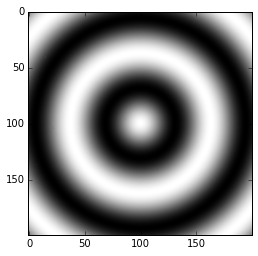

In [5]:
plt.imshow(img, cmap='gray')
plt.show()

In [6]:
data_dir = "/Volumes/Data/BeamLines/CHX/Luxi_description_files_for_duke/duke_cc_12C/"
duke_ndata = np.load(data_dir+"duke_img_1_5000.npy")
duke_dark = np.load(data_dir+"duke_dark.npy")

duke_data = []
for i in range(duke_ndata.shape[0]):
    duke_data.append(duke_ndata[i] - duke_dark)
    
duke_data=np.asarray(duke_data)

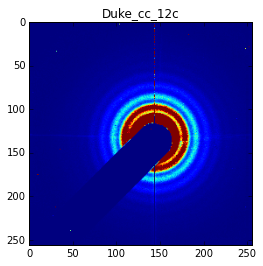

In [7]:
sum_img = np.average(duke_data, axis=0)
plt.imshow(sum_img, vmax=1e0)
plt.title("Duke_cc_12c")
plt.show()

In [37]:
auto_img=auto_mask(sum_img)

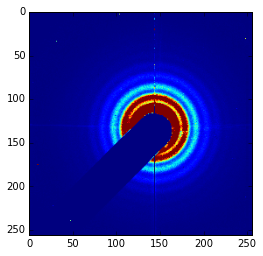

In [38]:
plt.imshow(auto_img, vmax=1e0)
plt.show()

In [10]:
hist, bin_edges = np.histogram(auto_img, bins=60)

In [11]:
bin_centers = 0.5*(bin_edges[:-1] + bin_edges[1:])

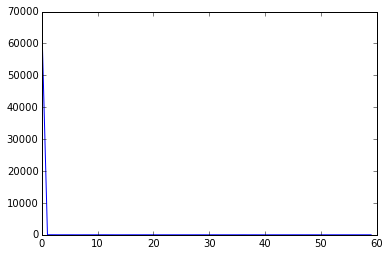

In [12]:
plt.plot(hist)

In [13]:
import scipy
binary_img = auto_img >0.01
open_img = scipy.ndimage.binary_opening(binary_img)

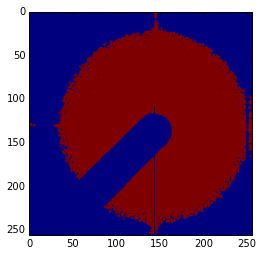

In [14]:
plt.imshow(open_img, vmax=1e0)

In [15]:
np.save("auto_img.npy", auto_img)

In [16]:
mask = ~np.load("auto_mask.npy")

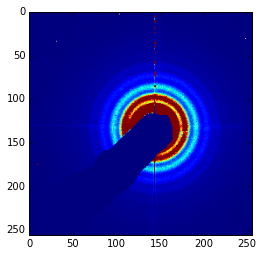

In [18]:
plt.imshow(mask*auto_img, vmax=1e0)

In [74]:
import skxray.speckle_visibility.speckle_visibility as spe_vis

In [88]:
center = (133, 143)

bin_center, ring_avg = spe_vis.circular_average(mask*auto_img, center)


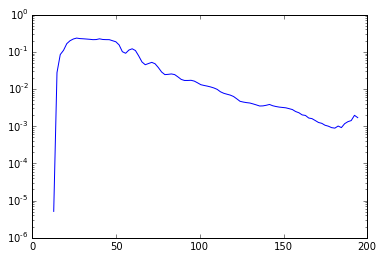

In [89]:
plt.semilogy(bin_center, ring_avg)

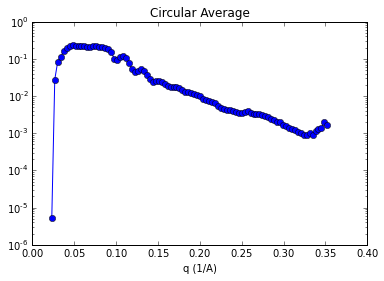

In [91]:
import skxray.core as core
dist_sample = 2230 # mm

two_theta = core.radius_to_twotheta(dist_sample, bin_center)
wavelength = 1.5498

q_val = core.twotheta_to_q(two_theta, wavelength)
plt.title("Circular Average")
plt.xlabel("q (1/A)")
plt.semilogy(q_val, ring_avg, '-o')

plt.show()
 